## This algorithm of this probem can be used as a general algorithm for predicting sales of any mart

### Problem Statement:
 **We are given sales based on items attributes and also on the basis of store location attributes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
train_data=r'F:\Study\Machine Learning\Big Mart Sales problem\train_v9rqX0R (1).csv'
train_df=pd.read_csv(train_data)
train_copy=train_df.copy()

In [ ]:
train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train_copy.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train_copy.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train_copy.shape

(8523, 12)

In [ ]:
train_copy.isnull().any(axis=1).sum()

3873

### Exploratory data analysis

#### Univariate analysis

In [ ]:
# To visualize continuous variable, we'll use histogram
# To visualize categorical variable, we'll use bar plot

Text(0, 0.5, 'count')

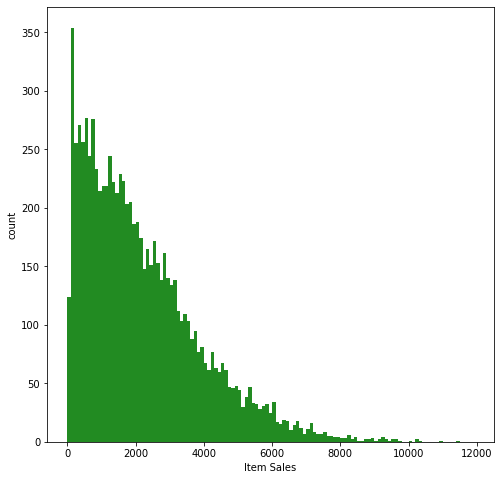

In [ ]:
plt.figure(figsize=(8,8))
plt.hist(train_copy['Item_Outlet_Sales'],color='forestgreen',histtype='bar',rwidth=300,bins=np.arange(start=0,stop=12000,step=100))
plt.xlabel('Item Sales')
plt.ylabel('count')

Above histogram shows that max sales is between 100$ to $200

Text(0, 0.5, 'Count')

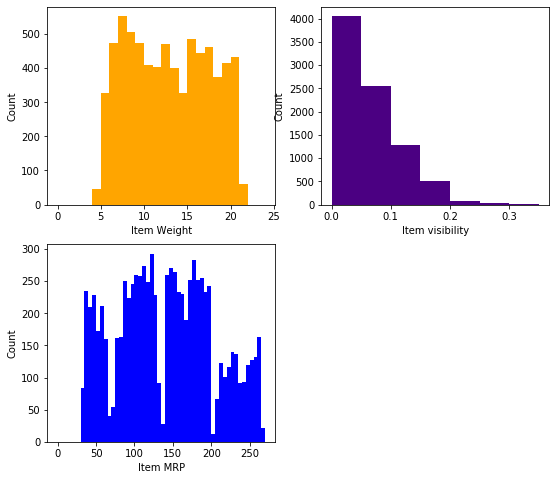

In [ ]:
plt.figure(figsize=(9,8))
plt.subplot(2,2,1)
plt.hist(train_copy['Item_Weight'],color='orange',bins=np.arange(start=0,stop=25,step=1))
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.subplot(2,2,2)
plt.hist(train_copy['Item_Visibility'],color='indigo',bins=np.arange(start=0,stop=0.4,step=.05))
plt.xlabel('Item visibility')
plt.ylabel('Count')
plt.subplot(2,2,3)
plt.hist(train_copy['Item_MRP'],color='blue',bins=np.arange(start=0,stop=275,step=5))
plt.xlabel('Item MRP')
plt.ylabel('Count')


1. There is no clear pattern of item weight. It's graph is almost uniform
2. Item visibility column has definetly some problem since items with 0 visibility are having max sales
3. Item MRP is showing 4 categories

In [ ]:
train_copy['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Low Fat, LF, low fat are the same thing. So their is not point in treating them as seperate 
#Similarily is the case of reg, Regular

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
train_copy['Item_Fat_Content']=le.fit_transform(train_copy['Item_Fat_Content'])

In [ ]:
train_copy['Item_Fat_Content'].value_counts()

1    5089
2    2889
0     316
4     117
3     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
train_copy['Item_Fat_Content']=train_copy['Item_Fat_Content'].apply(lambda x: 'Low Fat' if x in [1,0,3] else 'Regular')

Text(0, 0.5, 'count')

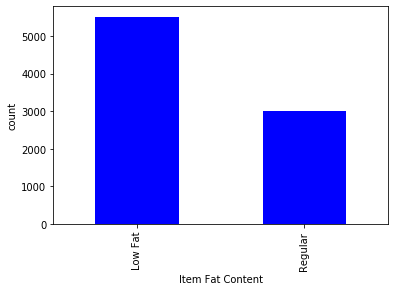

In [ ]:
train_copy['Item_Fat_Content'].value_counts().plot(kind='bar',color='blue')
plt.xlabel('Item Fat Content')
plt.ylabel('count')

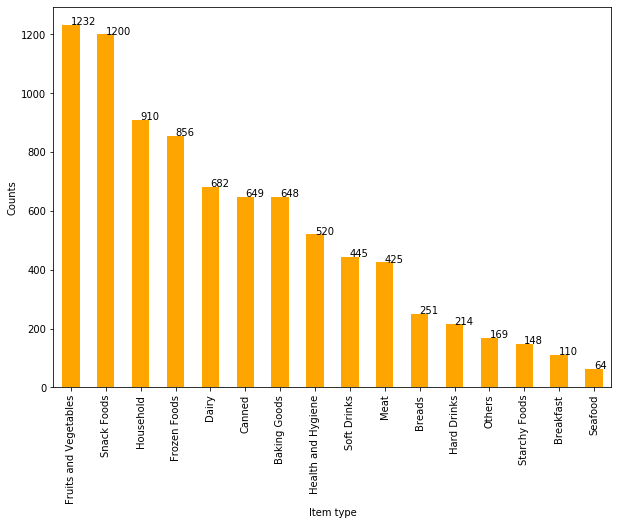

In [ ]:
plt.figure(figsize=(10,7))
train_copy['Item_Type'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('Item type')
plt.ylabel('Counts')
for index, values in enumerate(train_copy['Item_Type'].value_counts()):
    plt.text(index,values,str(values))

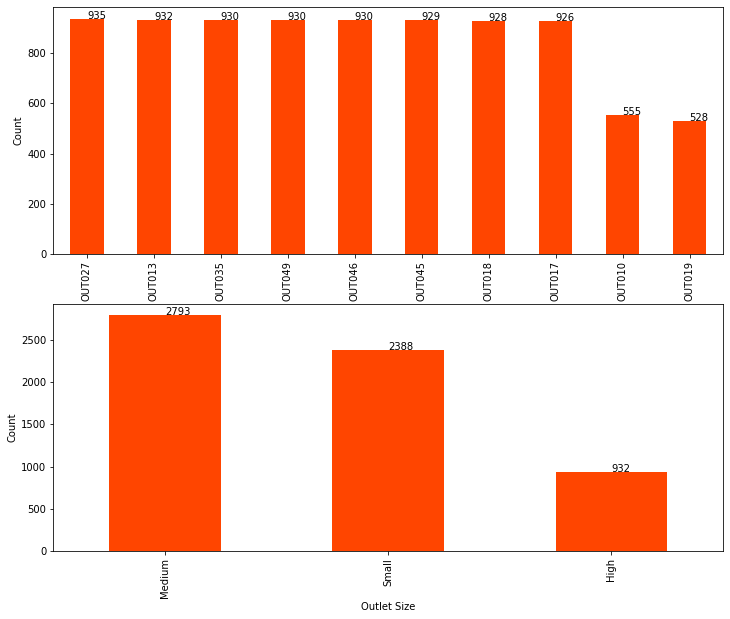

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
train_copy['Outlet_Identifier'].value_counts().plot(kind='bar',color='orangered')
plt.xlabel('Outlet store')
plt.ylabel('Count')
for index,value in enumerate(train_copy['Outlet_Identifier'].value_counts()):
    plt.text(index,value,str(value))
plt.subplot(2,1,2)
train_copy['Outlet_Size'].value_counts().plot(kind='bar',color='orangered')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
for index,value in enumerate(train_copy['Outlet_Size'].value_counts()):
    plt.text(index,value,str(value))


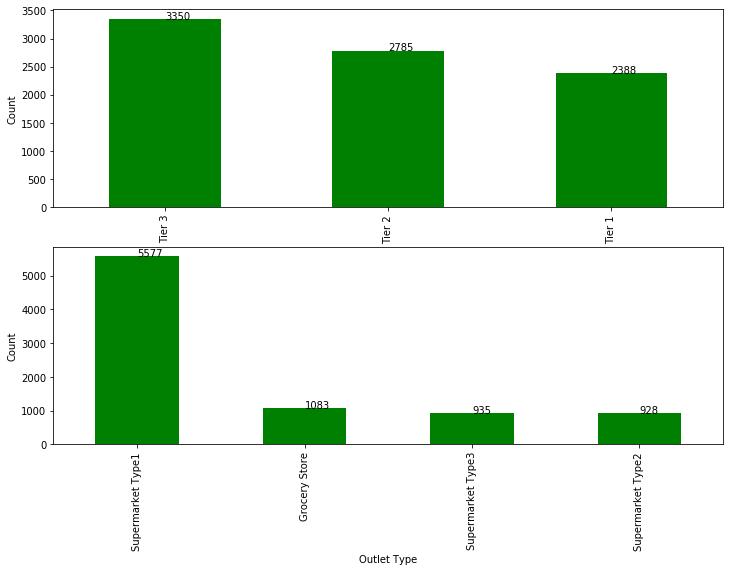

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
train_copy['Outlet_Location_Type'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
for index,value in enumerate(train_copy['Outlet_Location_Type'].value_counts()):
    plt.text(index,value,str(value))
plt.subplot(2,1,2)
train_copy['Outlet_Type'].value_counts().plot(kind='bar',color='green')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
for index,value in enumerate(train_copy['Outlet_Type'].value_counts()):
    plt.text(index,value,str(value))

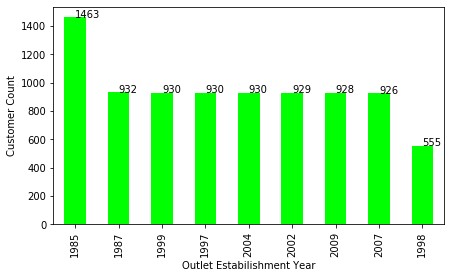

In [ ]:
plt.figure(figsize=(7,4))
train_copy['Outlet_Establishment_Year'].value_counts().plot(kind='bar',color='lime')
plt.xlabel('Outlet Estabilishment Year')
plt.ylabel('Customer Count')
for index, value in enumerate(train_copy['Outlet_Establishment_Year'].value_counts()):
    plt.text(index,value,str(value))

Outlet estabilishment in year 1985(oldest) shows most sales while sales for all other years is almost constant

#### Bivariate analysis

Text(0, 0.5, 'Item Outlet Sales')

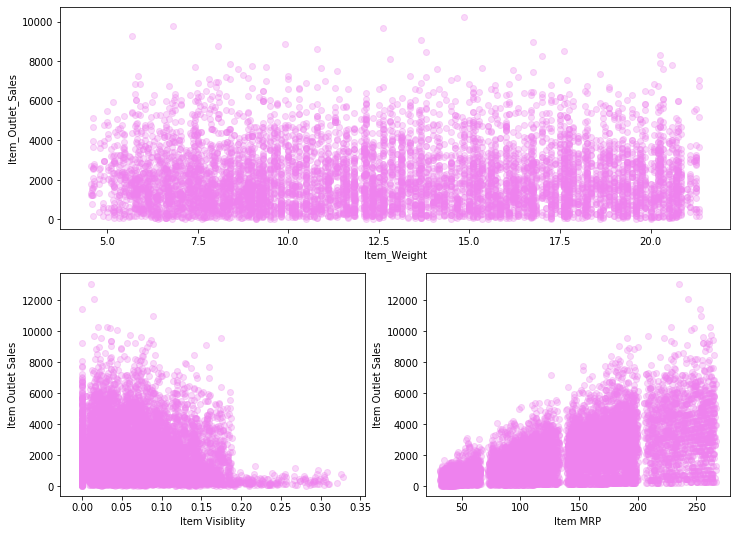

In [ ]:
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
plt.scatter(train_copy['Item_Weight'],train_copy['Item_Outlet_Sales'],alpha=.3,color='violet')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.subplot(2,2,3)
plt.scatter(train_copy['Item_Visibility'],train_copy['Item_Outlet_Sales'],alpha=.3,color='violet')
plt.xlabel('Item Visiblity')
plt.ylabel('Item Outlet Sales')
plt.subplot(2,2,4)
plt.scatter(train_copy['Item_MRP'],train_copy['Item_Outlet_Sales'],alpha=.3,color='violet')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')


Item Weight clearly has no relation with Item Sales.
Item Visibility shows that as visibility of item in store increases sales decreases.This seems to be strange since items with 0 visibility have registered most sales.
Item MRP is clearly a good indicator of Item Sales. Further, the scatter plot clearly shows four categorisation of Item MRP.

In [ ]:
import seaborn as sns

Text(0, 0.5, 'Item Outlet Sales')

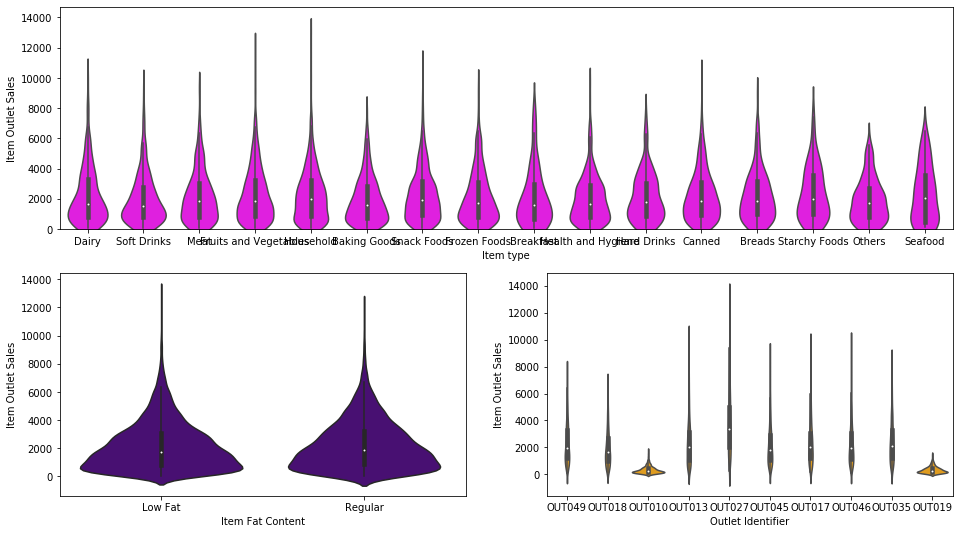

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.violinplot(train_copy['Item_Type'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='magenta')
plt.xlabel('Item type')
plt.ylabel('Item Outlet Sales')
plt.ylim(0,)
plt.subplot(2,2,3)
sns.violinplot(train_copy['Item_Fat_Content'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='indigo')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.subplot(2,2,4)
sns.violinplot(train_copy['Outlet_Identifier'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='orange')
plt.xlabel('Outlet Identifier')
plt.ylabel('Item Outlet Sales')


1. "Item Type" has no significant impact on item outlet sales
2. "Item Fat Content" also doesn't show any significant impact on outlet sales.
3. Concerning "Outlet Identifier":
Outlets *Out010* and *Out019* shows less sales as compared to others. Furthermore outlet *Out027* shows higher sales than others

(0, 14569.507164104814)

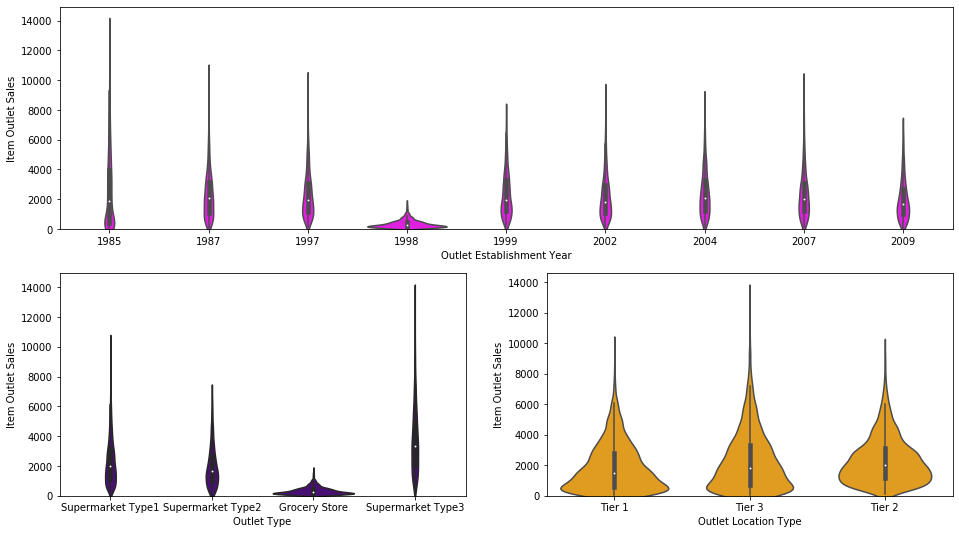

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.violinplot(train_copy['Outlet_Establishment_Year'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='magenta')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.ylim(0,)
plt.subplot(2,2,3)
sns.violinplot(train_copy['Outlet_Type'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='indigo')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.ylim(0,)
plt.subplot(2,2,4)
sns.violinplot(train_copy['Outlet_Location_Type'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='orange')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.ylim(0,)

1. 'Outlet Estabilishment Year' has no significant impact on Item Sales. Only the year 1998 shows significant difference in sales.
2. 'Outlet Type' is clearly a variable affecting Item Sales. Grocery Store registered least sales while Supermarket type 3 gives most sales.
3. In 'Output Location Type' variable, Tier 1 and Tier 2 gives almost same figure. But Tier 3 gives higher sales

(0, 14573.607968286908)

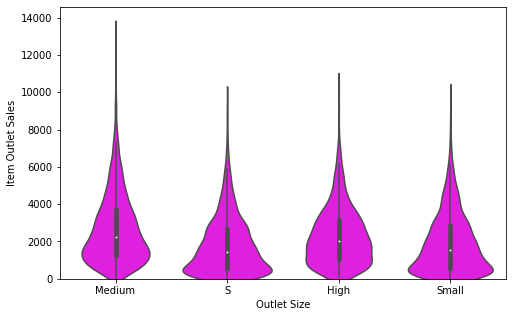

In [ ]:
sample=train_copy.replace(to_replace=np.nan,value='S')
plt.figure(figsize=(8,5))
sns.violinplot(sample['Outlet_Size'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='magenta')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.ylim(0,)

Stores with medium and high outlet size have more sales than small outlet.
Furthermore, shape of Small and S i.e. nan is almost the same.
From this we came to know that all nan values are 'Small'.

### Missing value treatment

In [ ]:
#We have seen that item weight has no impact on item sales. Hence, it's better to drop it 
train_copy.pop('Item_Weight')
#We have seen that nan values are 'Small' in Outlet Size. So, we'll replace it
train_copy['Outlet_Size']=train_copy['Outlet_Size'].replace(np.nan,value='Small')

In [ ]:
"""We have seen that item with visibility 0 have most sales and as visibility is increasing sales is decreasing which is
completely contrary to the trend. Since, with increase in item visibility product sales increases.
The possible reason for this is that values are recorded in opposite manner."""
train_copy['Item_Visibility']=train_copy['Item_Visibility'].max()-train_copy['Item_Visibility']

Text(0, 0.5, 'Item Outlet Sales')

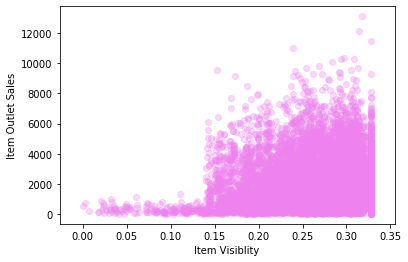

In [ ]:
plt.scatter(train_copy['Item_Visibility'],train_copy['Item_Outlet_Sales'],alpha=.3,color='violet')
plt.xlabel('Item Visiblity')
plt.ylabel('Item Outlet Sales')

### Feature Manipulation

In [ ]:
# We have seen 4 categories in items MRP. So we can categorize it

Text(0, 0.5, 'Count')

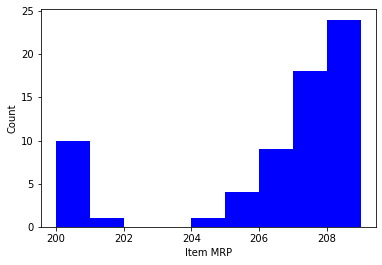

In [ ]:

sample=train_copy.loc[(train_copy['Item_MRP']>200) & (train_copy['Item_MRP']<210),['Item_MRP']]
plt.hist(sample['Item_MRP'],color='blue',bins=np.arange(start=200,stop=210,step=1))
plt.xlabel('Item MRP')
plt.ylabel('Count')

In [ ]:
# Similarity, we have to execute graph for all the suspicius value to find MRP which can act as seperator
# The seperators can be 69,136 and 203

In [ ]:
train_copy['MRP Category']=pd.cut(train_copy['Item_MRP'],bins=[0,69,136,203,267],labels=['cheap','moderate','high','expensive'])

In [ ]:
train_copy['MRP Category'].value_counts()

high         3002
moderate     2751
expensive    1429
cheap        1341
Name: MRP Category, dtype: int64

In [ ]:
# From the graph, it seens that we can also create 3 categories for Outlet Identifier also
train_copy['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
train_copy['Outlet_Identifier']=le.fit_transform(train_copy['Outlet_Identifier'])


In [ ]:

train_copy['Outlet_Identifier'].value_counts()

5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
train_copy['Outlet_Identifier']=train_copy['Outlet_Identifier'].apply(lambda x:'low' if x in [0,4] else 'High')

In [ ]:
train_copy['Item_Category']=train_copy['Item_Identifier'].str[:2]

Text(0, 0.5, 'Item Outlet Sales')

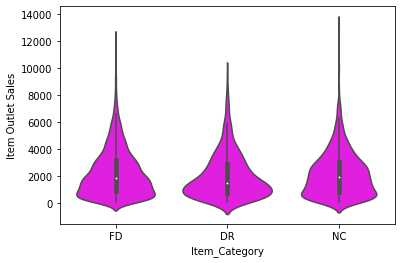

In [ ]:
sns.violinplot(train_copy['Item_Category'],train_copy['Item_Outlet_Sales'],inner='box',orient='v',color='magenta')
plt.xlabel('Item_Category')
plt.ylabel('Item Outlet Sales')

In [ ]:
group=train_copy[['Item_Category','Item_Outlet_Sales']].groupby(by=['Item_Category']).mean()
print(group)

               Item_Outlet_Sales
Item_Category                   
DR                   1997.333337
FD                   2215.354223
NC                   2142.721364


In [ ]:
train_copy.pop('Item_MRP')

0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64

In [ ]:
train_copy['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
train_copy['Outlet_Establishment_Year']=le.fit_transform(train_copy['Outlet_Establishment_Year'])
train_copy['Outlet_Establishment_Year'].value_counts()

0    1463
1     932
6     930
4     930
2     930
5     929
8     928
7     926
3     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
train_copy['Outlet_Establishment_Year']=train_copy['Outlet_Establishment_Year'].apply(lambda x: 'Low Year' if x==3 else 'High Year')



In [ ]:
train_copy['Outlet_Establishment_Year'].value_counts()

High Year    7968
Low Year      555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
train_copy.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,MRP Category,Item_Category
0,FDA15,Low Fat,0.312344,Dairy,High,High Year,Medium,Tier 1,Supermarket Type1,3735.1380,expensive,FD
1,DRC01,Regular,0.309113,Soft Drinks,High,High Year,Medium,Tier 3,Supermarket Type2,443.4228,cheap,DR
2,FDN15,Low Fat,0.311631,Meat,High,High Year,Medium,Tier 1,Supermarket Type1,2097.2700,high,FD
3,FDX07,Regular,0.328391,Fruits and Vegetables,low,Low Year,Small,Tier 3,Grocery Store,732.3800,high,FD
4,NCD19,Low Fat,0.328391,Household,High,High Year,High,Tier 3,Supermarket Type1,994.7052,cheap,NC


### Encoding categorical data 

In [ ]:
df=pd.get_dummies(train_copy['Item_Fat_Content'])
train_copy=pd.concat([train_copy,df],axis=1)


In [ ]:
df=pd.get_dummies(train_copy['Outlet_Identifier'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['Outlet_Establishment_Year'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['Outlet_Type'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['MRP Category'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['Item_Category'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['Outlet_Size'])
train_copy=pd.concat([train_copy,df],axis=1)
df=pd.get_dummies(train_copy['Outlet_Location_Type'])
train_copy=pd.concat([train_copy,df],axis=1)

In [ ]:
train_copy['Item_Type']=le.fit_transform(train_copy['Item_Type'])

In [ ]:
del train_copy['Outlet_Identifier']
del train_copy['Outlet_Establishment_Year']
del train_copy['Outlet_Type']
del train_copy['MRP Category']
del train_copy['Item_Category']
del train_copy['Item_Fat_Content']
del train_copy['Outlet_Size']
del train_copy['Outlet_Location_Type']

In [ ]:
train_copy.dtypes

Item_Identifier       object
Item_Visibility      float64
Item_Type              int32
Item_Outlet_Sales    float64
Low Fat                uint8
Regular                uint8
High                   uint8
low                    uint8
High Year              uint8
Low Year               uint8
Grocery Store          uint8
Supermarket Type1      uint8
Supermarket Type2      uint8
Supermarket Type3      uint8
cheap                  uint8
moderate               uint8
high                   uint8
expensive              uint8
DR                     uint8
FD                     uint8
NC                     uint8
High                   uint8
Medium                 uint8
Small                  uint8
Tier 1                 uint8
Tier 2                 uint8
Tier 3                 uint8
dtype: object

In [ ]:
train_copy['Item_Visibility']=train_copy['Item_Visibility'].astype('float')

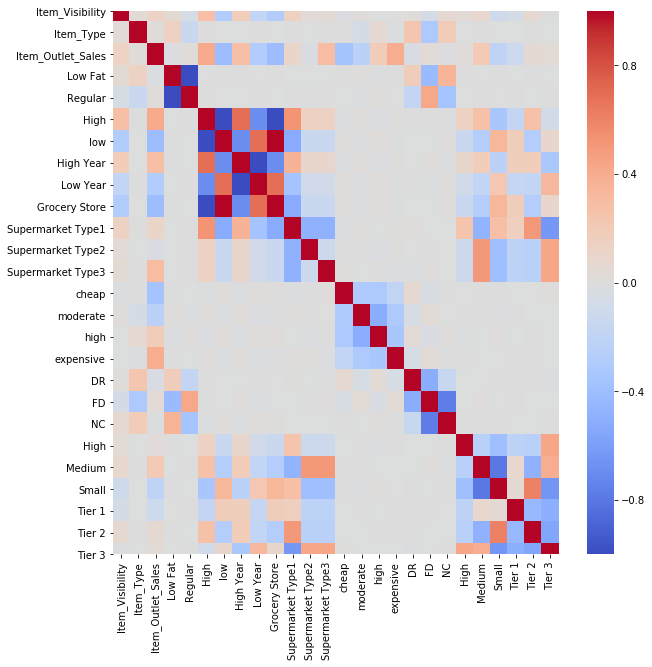

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_copy.corr(),xticklabels=train_copy.corr().columns.values,yticklabels=train_copy.corr().columns.values,cmap='coolwarm')


In [ ]:
# In above heat map, DR, FD and NC columns have no correlation with sales
del train_copy['DR']
del train_copy['FD']
del train_copy['NC']

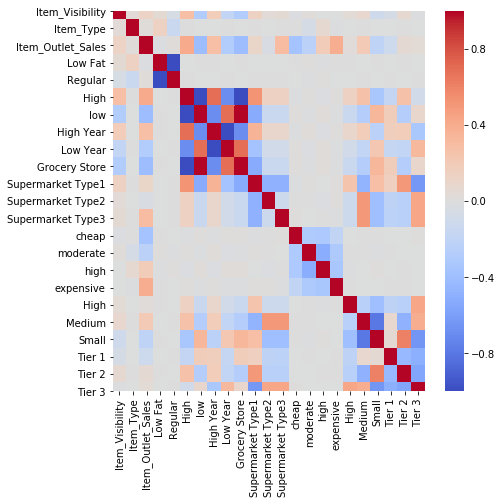

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(train_copy.corr(),xticklabels=train_copy.corr().columns.values,yticklabels=train_copy.corr().columns.values,cmap='coolwarm')


In [ ]:
# Tier 1, Tier 2 and Tier 3 are showing very weak correlation with output variables
del train_copy['Tier 1']
del train_copy['Tier 2']
del train_copy['Tier 3']

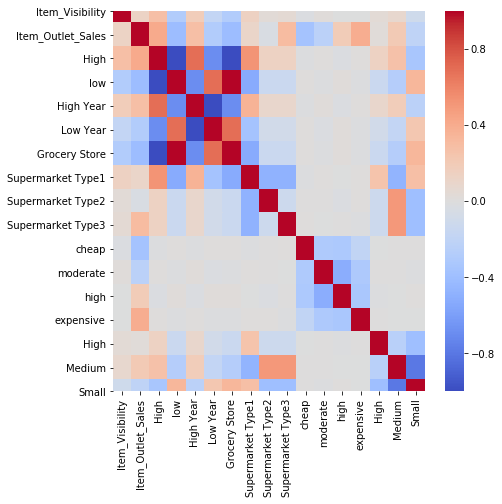

In [ ]:
#Item type is also showing negligible correlation with item outlet sales
# Low fat and Regular is also not showing any correlation with item outlet sales
del train_copy['Item_Type']
del train_copy['Low Fat']
del train_copy['Regular']
plt.figure(figsize=(7,7))
sns.heatmap(train_copy.corr(),xticklabels=train_copy.corr().columns.values,yticklabels=train_copy.corr().columns.values,cmap='coolwarm')


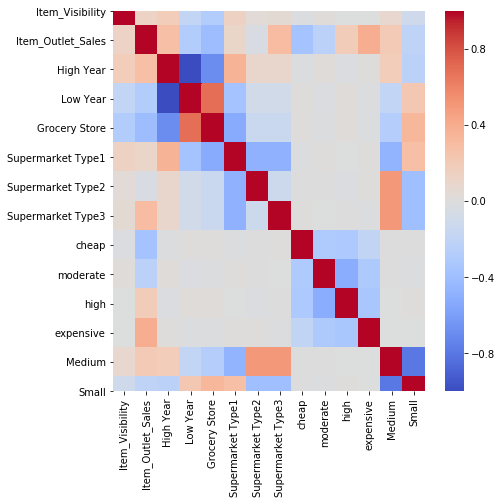

In [ ]:
#Item visibility due to it's being skewed is creating the problem of homoscedasticity
# Similar is the problem with high and low column
del train_copy['High']
del train_copy['low']
plt.figure(figsize=(7,7))
sns.heatmap(train_copy.corr(),xticklabels=train_copy.corr().columns.values,yticklabels=train_copy.corr().columns.values,cmap='coolwarm')

In [ ]:
# Similar is the problem created by 'High Year' and 'Low Year' column due to comparatively very low observations of 'Low Year'
del train_copy['Item_Visibility']
del train_copy['High Year']
del train_copy['Low Year']

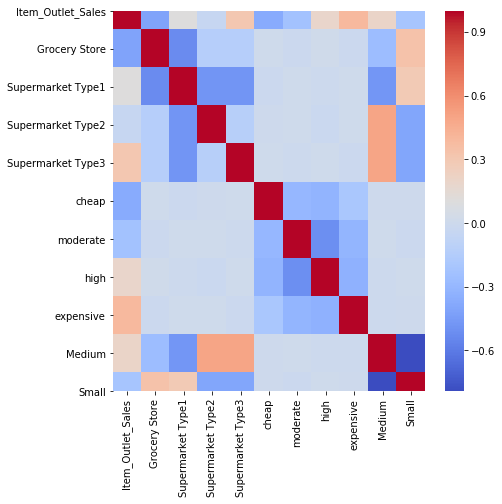

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(train_copy.corr(),xticklabels=train_copy.corr().columns.values,yticklabels=train_copy.corr().columns.values,cmap='coolwarm')

### Model Building

In [ ]:
train_copy.columns

Index(['Item_Identifier', 'Item_Outlet_Sales', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'cheap',
       'moderate', 'high', 'expensive', 'Medium', 'Small'],
      dtype='object')

In [ ]:
X=train_copy.iloc[:,2:].values
y=train_copy.iloc[:,1].values

In [ ]:
print(X)
print(y)

[[0 1 0 ... 1 1 0]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 0 1]]
[3735.138   443.4228 2097.27   ... 1193.1136 1845.5976  765.67  ]


In [ ]:
print(X.shape)
print(y.shape)

(8523, 10)
(8523,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(6392, 10)
(6392,)


#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1177.869404057143


**RMSE value in Linear Regression model is 1177.869**

#### Lasso and Ridge Regression

In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso(random_state=0)

In [ ]:
ls.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1177.869404057143


**RMSE value in Lasso regression is 1177.869**

#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,random_state=0)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1121.6414111529264


**RMSE value in Random Forest Regression is 1121.64**

#### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(n_estimators=200,learning_rate=1,random_state=0)

In [ ]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [ ]:
y_pred=gbr.predict(X_test)
print('RMSE:',sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 1121.7018210512533


**RMSE value in Gradient Boosting is 1121.7018**

**From all the above model:**
The best model is Random Forest Regression with RMSE value of 1121.64